            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


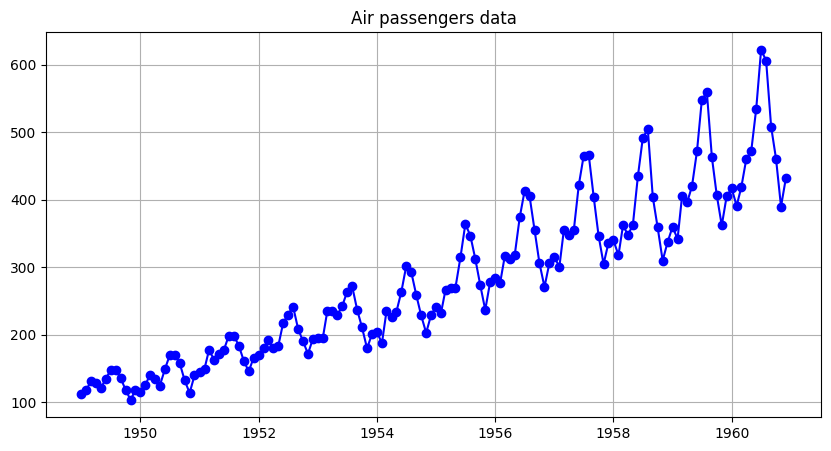

ADF Statistic:  0.8154
P-value:  0.9919
The series is not stationary
Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 143, dtype: float64


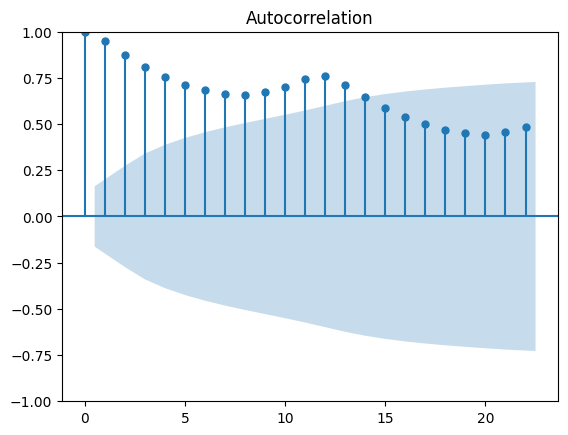

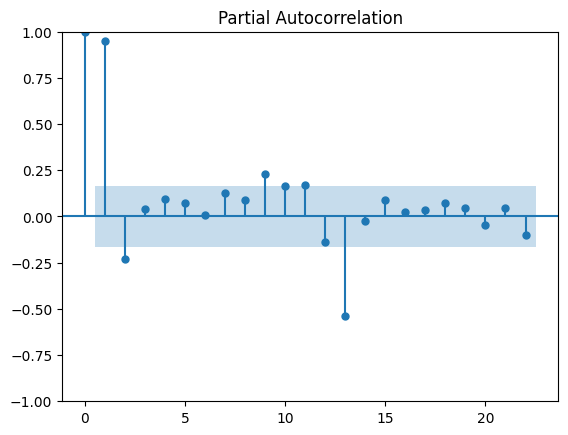

C:\Users\Deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -696.464
Date:                Tue, 14 Oct 2025   AIC                           1398.928
Time:                        20:49:09   BIC                           1407.796
Sample:                    01-01-1949   HQIC                          1402.532
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3130      0.100      3.127      0.002       0.117       0.509
ma.L1         -0.9998      5.894     -0.170      0.865     -12.551      10.552
sigma2      1034.0009   6133.239      0.169      0.8

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima.model import ARIMA 
from sklearn.metrics import mean_squared_error

data=pd.read_csv('AirPassengers.csv',parse_dates=['Month'],index_col='Month')
print(data.head())
series2=(data['#Passengers'])
#print(series2)
plt.figure(figsize=(10,5))
plt.plot(series2,color='blue',marker='o')
plt.title("Air passengers data")
plt.xlabel="Year"
plt.ylabel="Months"
plt.grid(True)
plt.show()


result=adfuller(series2)
print(f'ADF Statistic: {result[0]: .4f}') 
print(f'P-value: {result[1]: .4f}')
if result[1]< 0.05:
    print('The series is stationary') 
else: 
    print('The series is not stationary') 
    data_diff=series2.diff().dropna()
    print(data_diff)

plot_acf(series2)
plt.show()
plot_pacf(series2)
plt.show()

model=ARIMA(series2,order=(1,2,1))
fit=model.fit()
print(fit.summary())

#forecast next 24 months
forecast=fit.forecast(24)
forecast_result=pd.date_range(start=data.index[1]+pd.DateOffset(months=1),periods=24,freq='MS')
print("The forecasted result:",forecast_result.tolist())

In [2]:
data.index[1]

Timestamp('1949-02-01 00:00:00')

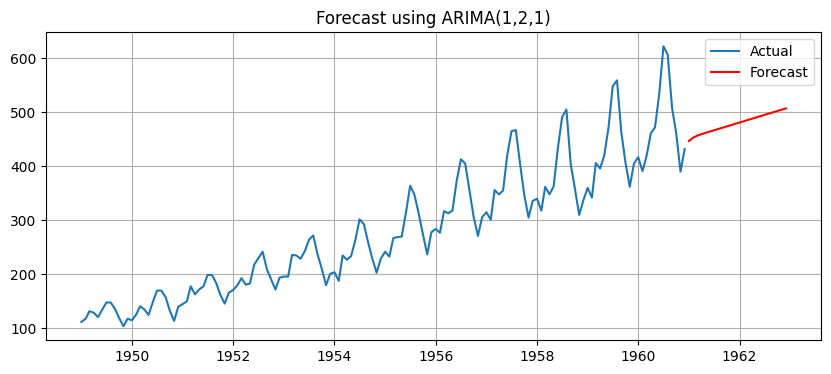

C:\Users\Deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Squared Error:  8226.72


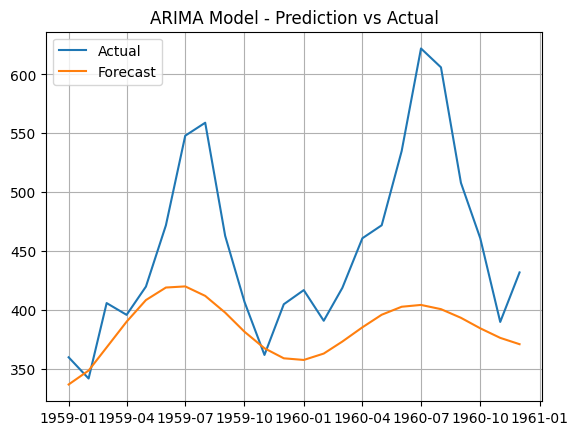

In [3]:
#plot annual + forecast 
plt.figure(figsize=(10,4)) 
plt.plot(data['#Passengers'], label='Actual') 
plt.plot(forecast, label='Forecast', color='red') 
plt.title('Forecast using ARIMA(1,2,1)') 
plt.legend() 
plt.grid() 
plt.show() 

train = data['#Passengers'][:-24] 
test = data['#Passengers'][-24:] 
model = ARIMA(train, order=(2,1,2)) 
model_fit = model.fit() 
preds = model_fit.forecast(steps=24) 
#evaluate 
mse = mean_squared_error(test, preds) 
print(f'Mean Squared Error: {mse: .2f}') 

#plot 
plt.plot(test.index, test.values, label='Actual') 
plt.plot(test.index, preds.values, label='Forecast') 
plt.title('ARIMA Model - Prediction vs Actual') 
plt.legend() 
plt.grid() 
plt.show() 

In [ ]:

#regression
import pandas as pd
dataset = pd.read_csv('Salary_dataset.csv') 
print(dataset)
x = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values 
print(y) 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 1/3, random_state=0)
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(x_train, y_train) 
y_pred = regressor.predict(x_test) 
x_pred = regressor.predict(x_train) 
print(y_pred) 
print(x_pred) 
plt.scatter(x_train, y_train, color='pink') 
plt.plot(x_train, x_pred, color='lightblue') 
plt.title('Salary Vs Experience (Training Set)') 
plt.xlabel('Years of Experience') 
plt.ylabel('Salary (in rupees)') 
plt.show() 

C:\Users\Deepa\AppData\Local\Temp\ipykernel_12396\930124550.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2018-01-01', periods=60, freq='M')


,Month,Sales
0,2018-01-31,204.967142
1,2018-02-28,200.617357
2,2018-03-31,210.476885
3,2018-04-30,221.230299
4,2018-05-31,205.658466


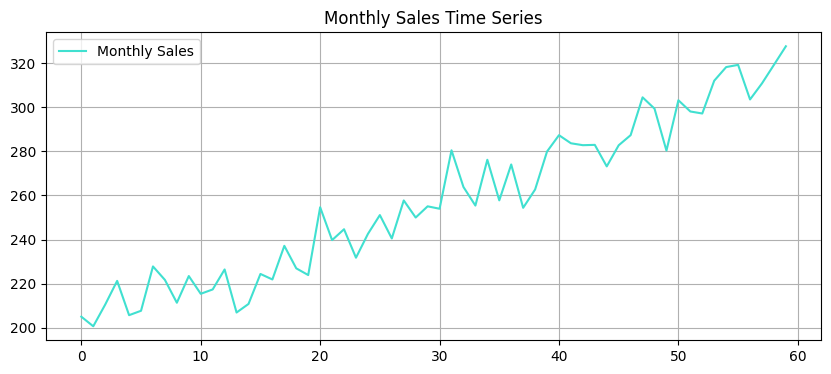

ADF Statistics: 1.291449679869715
p-value: 0.9965606304178265
The data is not stationary.
                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.403
Date:                Tue, 14 Oct 2025   AIC                            456.805
Time:                        21:00:34   BIC                            463.038
Sample:                             0   HQIC                           459.238
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0771      0.293     -0.264      0.792      -0.650       0.496
ma.L1         -0.4760      0.260     -1.8

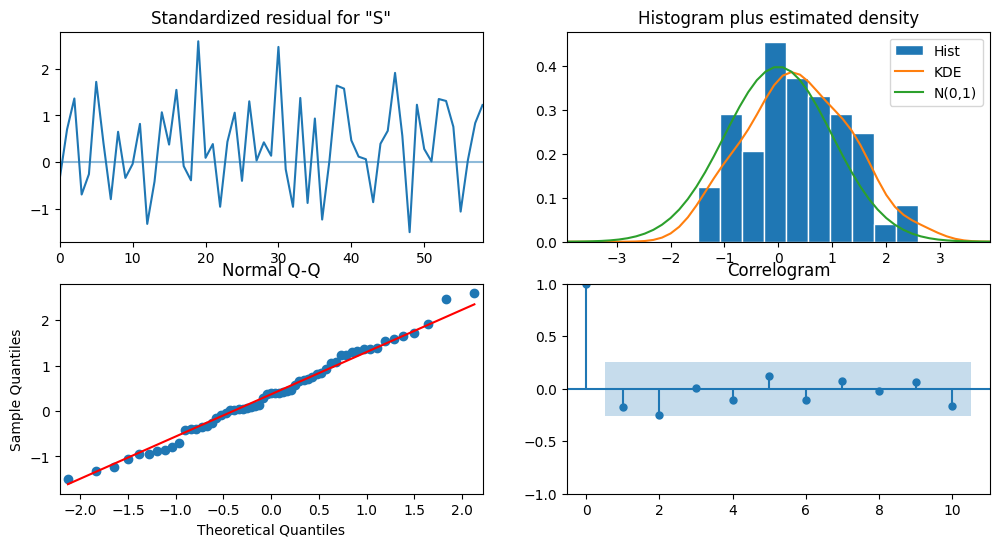

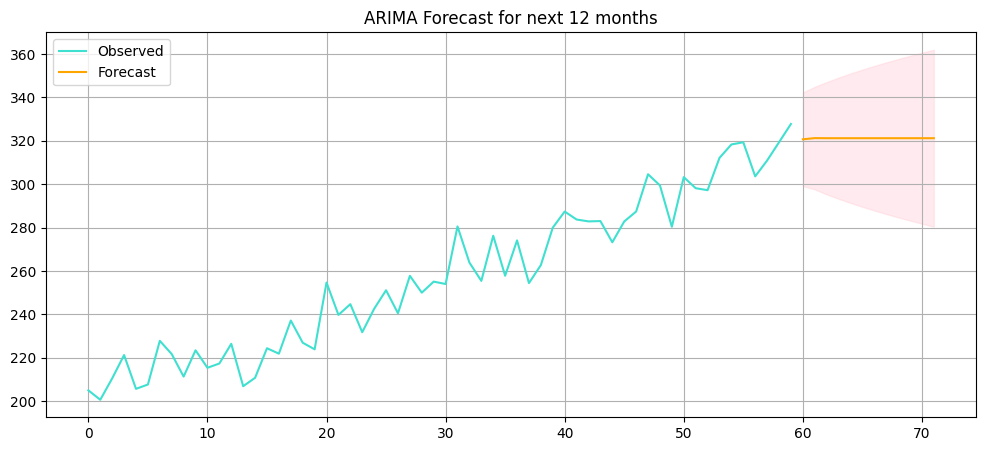

In [15]:
#pmd arima
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA 
#from pmdarima import auto_arima 
np.random.seed(42) 
months = pd.date_range(start='2018-01-01', periods=60, freq='M') 
sales = 200 + np.arange(60)*2 + np.random.normal(0, 10, 60) #upward trend + noise 
data = pd.DataFrame({'Month': months, 'Sales': sales}) 
display(data.head())
plt.figure(figsize=(10, 4)) 
plt.plot(data['Sales'], label='Monthly Sales', color='turquoise') 
#plt.xlabel('Month') 
#plt.ylabel('Sales') 
plt.title('Monthly Sales Time Series') 
plt.grid() 
plt.legend() 
plt.show() 
result = adfuller(data['Sales']) 
print('ADF Statistics:', result[0]) 
print('p-value:', result[1]) 
if result[1] > 0.05: 
    print('The data is not stationary.') 
else: 
    print('The data is non-stationary.')
model = ARIMA(data['Sales'], order=(1, 1, 1)) 
model_fit = model.fit() 
print(model_fit.summary()) 
model_fit.plot_diagnostics(figsize=(12, 6)) 
plt.show()
forecast = model_fit.get_forecast(steps=12) 
forecast_df = forecast.summary_frame() 
#plot forecast 
plt.figure(figsize=(12, 5)) 
plt.plot(data['Sales'], label='Observed', color='turquoise') 
plt.plot(forecast_df['mean'], label='Forecast', color='orange') 
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], 
forecast_df['mean_ci_upper'], color='pink', alpha=0.3) 
#plt.xlabel('Month') 
#plt.ylabel('Sales') 
plt.title('ARIMA Forecast for next 12 months') 
plt.legend() 
plt.grid() 
plt.show()

C:\Users\Deepa\AppData\Local\Temp\ipykernel_12396\3429629077.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2020-01', periods=36, freq='M')


2020-01-31    335.281047
2020-02-29    308.003144
2020-03-31    319.574760
2020-04-30    344.817864
2020-05-31    337.351160
Freq: ME, dtype: float64

2020-01-31    335.281047
2020-02-29    308.003144
2020-03-31    319.574760
2020-04-30    344.817864
2020-05-31    337.351160
Freq: ME, dtype: float64

2020-01-31    335.281047
2020-02-29    308.003144
2020-03-31    319.574760
2020-04-30    344.817864
2020-05-31    337.351160
Freq: ME, dtype: float64

2020-01-31    335.281047
2020-02-29    308.003144
2020-03-31    319.574760
2020-04-30    344.817864
2020-05-31    337.351160
Freq: ME, dtype: float64

2020-01-31    335.281047
2020-02-29    308.003144
2020-03-31    319.574760
2020-04-30    344.817864
2020-05-31    337.351160
Freq: ME, dtype: float64

2020-01-31    335.281047
2020-02-29    308.003144
2020-03-31    319.574760
2020-04-30    344.817864
2020-05-31    337.351160
Freq: ME, dtype: float64

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -201.248
Date:                Tue, 14 Oct 2025   AIC                            408.496
Time:                        21:02:45   BIC                            413.162
Sample:                    01-31-2020   HQIC                           410.107
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3033      0.247      1.226      0.220      -0.182       0.788
ma.L1         -0.9993     27.635     -0.036      0.971     -55.163      53.164
sigma2      5311.2970   1.47e+05      0.036      0.9

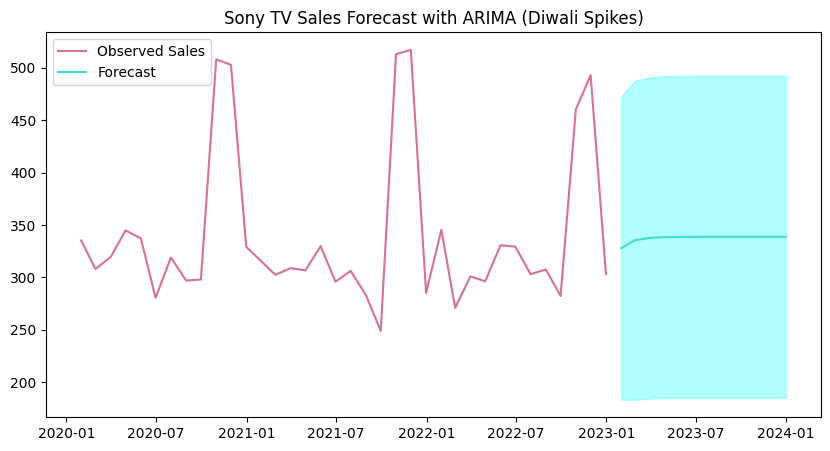

In [17]:
#spikes monthly
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA 

np.random.seed(0) 
months = pd.date_range(start='2020-01', periods=36, freq='M') 
base_sales = 300 + np.random.normal(0, 20, 36) 
#add diwali spikes (oct/nov each year) 
for i in range(len(months)): 
    if months[i].month in [10, 11]: #diwali months 
        base_sales[i] += 200 
        sales = pd.Series(base_sales, index=months) 
        display(sales.head())

model = ARIMA(sales, order=(1,1,1)) 
model_fit = model.fit() 
print(model_fit.summary())
#forecast 12 months ahead 
forecast = model_fit.get_forecast(steps=12) 
pred = forecast.predicted_mean 
conf = forecast.conf_int() 
#plot 
plt.figure(figsize=(10, 5)) 
plt.plot(sales, label='Observed Sales', color='palevioletred') 
plt.plot(pred, label='Forecast', color='turquoise') 
plt.fill_between(conf.index, conf.iloc[:, 0], conf.iloc[:, 1], color='cyan', alpha=0.3) 
plt.title('Sony TV Sales Forecast with ARIMA (Diwali Spikes)') 
plt.legend() 
plt.show()

2022-09-01    47.916211
2022-09-02    49.718666
2022-09-03    39.319020
2022-09-04    58.201354
2022-09-05    41.032822
                ...    
2022-11-25    43.077407
2022-11-26    56.836177
2022-11-27    56.089428
2022-11-28    47.689973
2022-11-29    51.754442
Freq: D, Length: 90, dtype: float64

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   90
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -374.009
Date:                Tue, 14 Oct 2025   AIC                            754.017
Time:                        21:10:28   BIC                            761.483
Sample:                    09-01-2022   HQIC                           757.027
                         - 11-29-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1638      2.678      0.061      0.951      -5.086       5.413
ma.L1         -0.2300      2.661     -0.086      0.931      -5.445       4.985
sigma2       261.6022     12.645     20.688      0.0

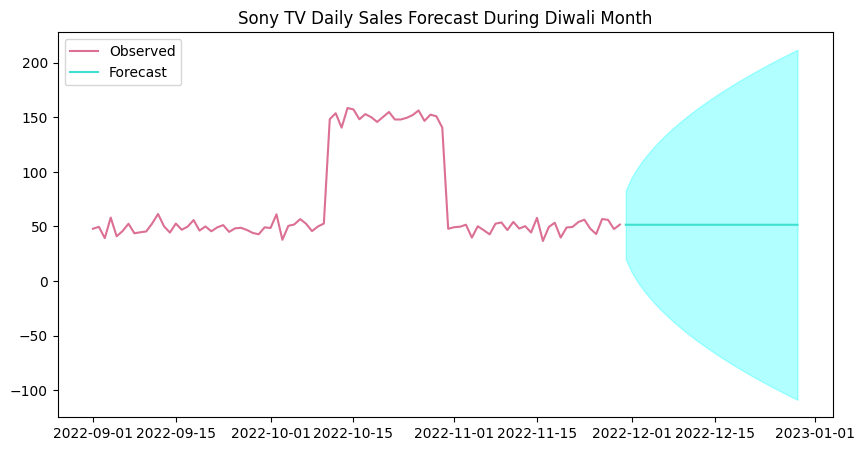

In [19]:
#Daily Sales 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA 
np.random.seed(2) 
days = pd.date_range(start='2022-09-01', periods=90, freq='D') 
sales = 50 + np.random.normal(0, 5, 90) 
#diwali effect (20 days before festival) 
sales[40:60] += 100 
series = pd.Series(sales, index=days) 
display(series)
model = ARIMA(series, order=(1,1,1)) 
model_fit = model.fit()
print(model_fit.summary())
#forecast 
forecast = model_fit.get_forecast(steps=30) 
pred = forecast.predicted_mean 
conf = forecast.conf_int() 
#plot 
plt.figure(figsize=(10, 5)) 
plt.plot(series, label='Observed', color='palevioletred') 
plt.plot(pred, label='Forecast', color='turquoise') 
plt.fill_between(conf.index, conf.iloc[:, 0], conf.iloc[:, 1], color='cyan', alpha=0.3) 
plt.title('Sony TV Daily Sales Forecast During Diwali Month') 
plt.legend() 
plt.show()


C:\Users\Deepa\AppData\Local\Temp\ipykernel_12396\1075913097.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.date_range('2010', periods=12, freq='Y')


2010-12-31    1189.431424
2011-12-31    1199.098220
2012-12-31    1259.370328
2013-12-31    1238.643547
2014-12-31    1395.221499
2015-12-31    1468.625687
2016-12-31    1559.499290
2017-12-31    1609.559057
2018-12-31    1715.990910
2019-12-31    1771.593644
2020-12-31    1807.034035
2021-12-31    1994.231119
Freq: YE-DEC, dtype: float64

C:\Users\Deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -62.043
Date:                Tue, 14 Oct 2025   AIC                            130.086
Time:                        21:12:07   BIC                            131.280
Sample:                    12-31-2010   HQIC                           129.333
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9939      0.150      6.616      0.000       0.699       1.288
ma.L1         -0.8740      1.457     -0.600      0.549      -3.730       1.982
sigma2      4009.3024   4378.905      0.916      0.3

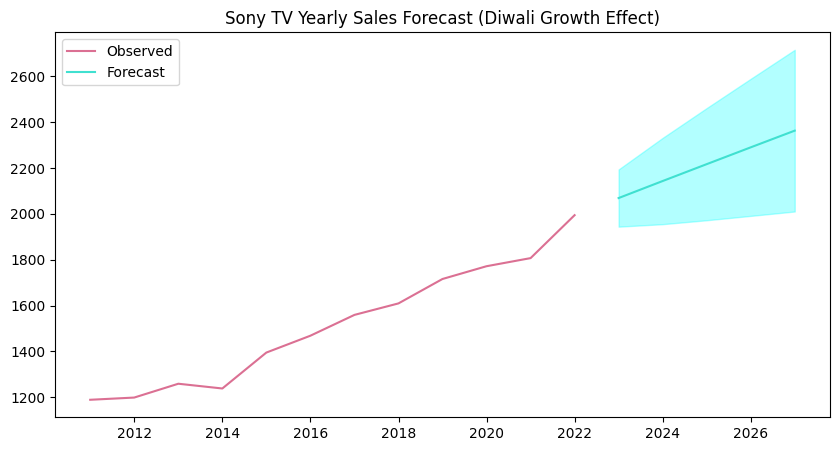

In [20]:
#Yearly sales with festival growth trend 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA 
np.random.seed(3) 
years = pd.date_range('2010', periods=12, freq='Y') 
sales = 1000 + 50*np.arange(12) + np.random.normal(0, 50, 12) 
#diwali contribution grows each year 
sales[::1] += np.linspace(100, 400, 12) 
series = pd.Series(sales, index=years) 
display(series)
model = ARIMA(series, order=(1,1,1)) 
model_fit = model.fit() 
print(model_fit.summary()) 
#forecast 
forecast = model_fit.get_forecast(steps=5) 
pred = forecast.predicted_mean 
conf = forecast.conf_int() 
#plot 
plt.figure(figsize=(10, 5)) 
plt.plot(series, label='Observed', color='palevioletred') 
plt.plot(pred, label='Forecast', color='turquoise') 
plt.fill_between(conf.index, conf.iloc[:, 0], conf.iloc[:, 1], color='cyan', alpha=0.3) 
plt.title('Sony TV Yearly Sales Forecast (Diwali Growth Effect)') 
plt.legend() 
plt.show() 

C:\Users\Deepa\AppData\Local\Temp\ipykernel_12396\2940546093.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range('2018-01', periods=60, freq='M')


2018-01-31    300.758426
2018-02-28    307.499270
2018-03-31    285.061366
2018-04-30    310.403978
2018-05-31    293.725477
Freq: ME, dtype: float64

2018-01-31    300.758426
2018-02-28    307.499270
2018-03-31    285.061366
2018-04-30    310.403978
2018-05-31    293.725477
Freq: ME, dtype: float64

2018-01-31    300.758426
2018-02-28    307.499270
2018-03-31    285.061366
2018-04-30    310.403978
2018-05-31    293.725477
Freq: ME, dtype: float64

2018-01-31    300.758426
2018-02-28    307.499270
2018-03-31    285.061366
2018-04-30    310.403978
2018-05-31    293.725477
Freq: ME, dtype: float64

2018-01-31    300.758426
2018-02-28    307.499270
2018-03-31    285.061366
2018-04-30    310.403978
2018-05-31    293.725477
Freq: ME, dtype: float64

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -335.300
Date:                Tue, 14 Oct 2025   AIC                            678.600
Time:                        21:14:02   BIC                            686.911
Sample:                    01-31-2018   HQIC                           681.844
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1247      0.503     -0.248      0.804      -1.110       0.860
ar.L2         -0.0622      0.527     -0.118      0.906      -1.095       0.970
ma.L1         -0.9997     33.435     -0.030      0.9

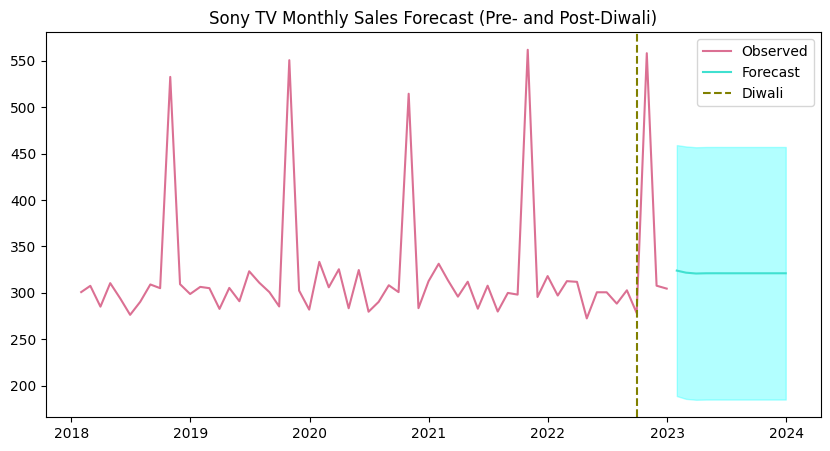

In [21]:
#Comparing Pre and Post Diwali Sales 
np.random.seed(4) 
months = pd.date_range('2018-01', periods=60, freq='M') 
sales = 300 + np.random.normal(0, 15, 60) 
#add sharp diwali spikes 
for i in range(len(months)): 
    if months[i].month == 10: 
        sales[i] += 250  
        series = pd.Series(sales, index=months) 
        display(series.head())
model = ARIMA(series, order=(2,1,1)) 
model_fit = model.fit() 
print(model_fit.summary()) 
forecast = model_fit.get_forecast(steps=12) 
pred = forecast.predicted_mean 
conf = forecast.conf_int()
plt.figure(figsize=(10, 5)) 
plt.plot(series, label='Observed', color='palevioletred') 
plt.plot(pred, label='Forecast', color='turquoise') 
plt.fill_between(conf.index, conf.iloc[:, 0], conf.iloc[:, 1], color='cyan', alpha=0.3) 
plt.axvline(x=pd.to_datetime('2022-10-01'), color='olive', linestyle='--', label='Diwali') 
plt.title('Sony TV Monthly Sales Forecast (Pre- and Post-Diwali)') 
plt.legend() 
plt.show()